# SCC-ICMC-USP - 2o. semestre de 2021
# SCC0275 - Exercício 3

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo:

Alunos:


1.   List item
2.   List item


# Carregando Iris

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv("iris_modif_novo.data", index_col=0)
iris

,A,B,C,D,E,F
0,4.9,3.0,1.4,30.0,0.2,Iris-setosa
1,4.7,3.2,1.3,32.0,0.2,Iris-setosa
2,4.6,3.1,1.5,31.0,0.2,Iris-setosa
3,5.0,3.6,1.4,36.0,0.2,Iris-setosa
4,5.4,3.9,1.7,39.0,0.4,Iris-setosa
...,...,...,...,...,...,...
144,6.7,3.0,5.2,30.0,2.3,Iris-virginica
145,6.3,2.5,5.0,25.0,1.9,Iris-virginica
146,6.5,3.0,5.2,30.0,2.0,Iris-virginica
147,6.2,3.4,5.4,34.0,2.3,Iris-virginica


# Parte 1 - Correlação e Covariância

### Questão 01.
* Calcule a matriz de covariância (`np.cov`)
* Crie um heatmap (`sns.heatmap`) para cada matriz
* Dica: Atente-se ao atributo rowvar

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

In [4]:
values_array = np.float64(iris.values[:, :-1]) # há necessidade de converter para float explicitamente...
cov_matrix = np.cov(values_array, rowvar=False)

<AxesSubplot:>

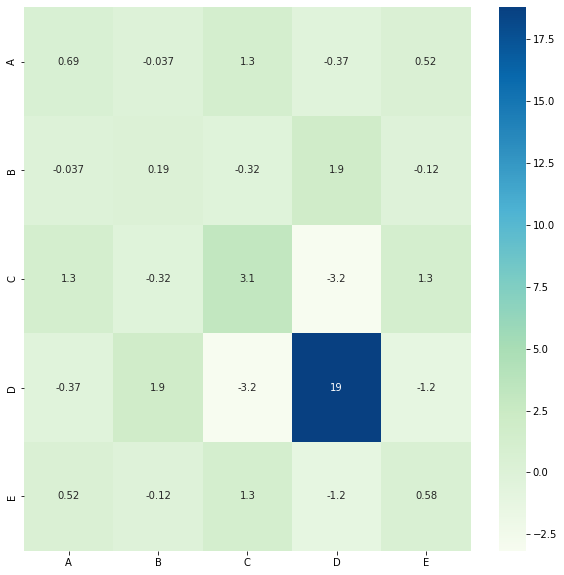

In [5]:
sns.heatmap(cov_matrix,
            annot=True,
            xticklabels=iris.columns[:-1],
            yticklabels=iris.columns[:-1],
            cmap="GnBu"
)

### Questão 02.

Repita o exercício anterior para correlação (usando `pandas.DataFrame.corr` ou `np.corrcoef`) utilizando o método de Pearson. Gere um heatmap da matriz.

<AxesSubplot:>

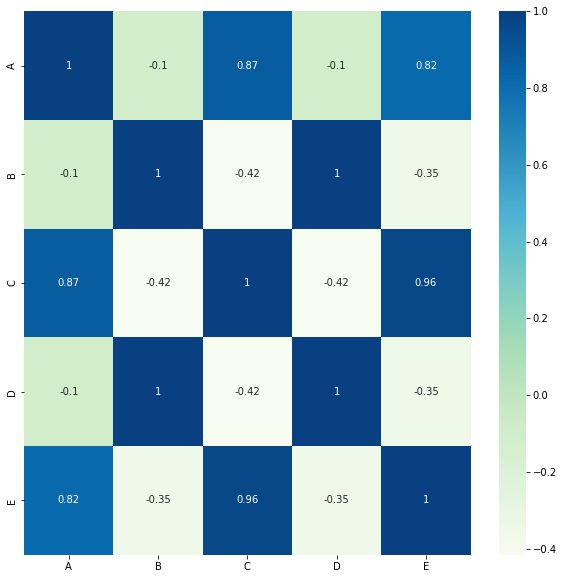

In [6]:
sns.heatmap(iris.corr(),
            annot=True,
            cmap="GnBu"
)

### Questão 03.

O método da Q2 apresenta alguma vantagem com relação ao método da Q1?

Resposta: Sim. A análise de covariância é sensível à escala dos valores analisados e este fato fica visível na observação do heatmap. Para a covariância, o valor da variância do atributo "D" se destaca bastante dos demais, prejudicando a análise dos demais atributos. Já a análise de correlação, por ter valores limitados entre -1 e 1 não apresenta o problema da covariância, e seu heatmap fica mais "uniforme". Na análise de correlação, como os valores estão normalizados é mais fácil identificar a "força" das relações.

### Questão 04.

- Identifique os atributos mais e menos correlacionados (em módulo) usando a correlação de Pearson.
- O que significa dizer que dois atributos possuem correlação **alta**?
- O que significa dizer que dois atributos possuem correlação **baixa**?

Resposta:

- Mais correlacionados: B e D (1). São fortemente diretamente proporcionais. Dados organizados linearmente.
- Menos correlacionados: B e A (-0.1). Não há uma relação linear perceptível entre os dados.

### Questão 05.

*  Utilizando o resultado da matriz de correlação, verifique se existe um atributo reduntante nessa base e crie um novo `Dataframe` sem ele e justifique.

In [7]:
iris_novo = iris.drop(columns=["D"])

Resposta: Observando a matriz de correlação, podemos observar que os atributos 'B' e 'D' possuem correlação máxima. Assim, podemos concluir que o atributo 'D', por exemplo, é redundante. Observando seus valores fica claro que os valores do atributo 'D' correspondem aos valores do atributo 'B' multiplicados por 10.

# Parte 2 - PCA

Na segunda parte do exercício, focaremos na análise de um novo conjunto de dados. O novo conjunto de dados apresenta dados a respeito da composição química de vinhos de 3 diferentes origens. Uma descrição mais detalhada do conjunto de dados será apresentada a seguir.

In [8]:
from sklearn.datasets import load_wine

In [9]:
raw_data = load_wine()

In [10]:
print(raw_data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [11]:
wine_df = pd.DataFrame(raw_data["data"], columns=raw_data["feature_names"])
wine_df["class"] = raw_data["target"]

In [12]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Questão 01

*     ***Observe que o conjunto de dados possuí apenas atributos numéricos***. Calcule todos os componentes principais utilizando PCA  (`sklearn.decomposition.PCA`). Lembre-se de padronizar os dados antes de aplica o PCA (sklearn.preprocessing.StandardScaler)
* Determine quanta variância dos dados cada componente é capaz de captar.
* ***Lembre-se*** de não considerar o atributo classe.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
# código de solução
scaler = StandardScaler()
pca = PCA()

In [15]:
values = wine_df.drop(columns="class").values

In [16]:
pca.fit(scaler.fit_transform(values))

PCA()

In [17]:
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Z{i+1} é responsável por {ratio*100} da variância total")

Z1 é responsável por 36.198848099926366 da variância total
Z2 é responsável por 19.20749025700897 da variância total
Z3 é responsável por 11.123630536249939 da variância total
Z4 é responsável por 7.069030182714024 da variância total
Z5 é responsável por 6.563293679648588 da variância total
Z6 é responsável por 4.935823319222574 da variância total
Z7 é responsável por 4.2386793226233115 da variância total
Z8 é responsável por 2.680748948378864 da variância total
Z9 é responsável por 2.2221534047897116 da variância total
Z10 é responsável por 1.930019093944078 da variância total
Z11 é responsável por 1.7368356899899153 da variância total
Z12 é responsável por 1.2982325756042126 da variância total
Z13 é responsável por 0.795214889899452 da variância total


# Questão 02

- Reduza a dimensionalidade do conjunto de dados para apenas **duas dimensões**.
- Qual o percentual da variância dos dados, duas componentes principais são capazes de captar?

* Dica: use o método ***fit_transform()*** da classe PCA.

In [18]:
# código de solução
pca = PCA(n_components=2)
new_values = pca.fit_transform(scaler.fit_transform(values))

In [19]:
print(f"- Duas componentes captam {pca.explained_variance_ratio_.sum()} da variância dos dados.")

- Duas componentes captam 0.5540633835693534 da variância dos dados.


# Questão 03

Faça um scatter-plot dos dados transformados e comente a distribuição dos dados.

* Sugestão: Adicione cores diferentes para cada classe para facilitar a visualização
* Pode-se utilizar o seaborn para realizar o plot (*sns.scatterplot*)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

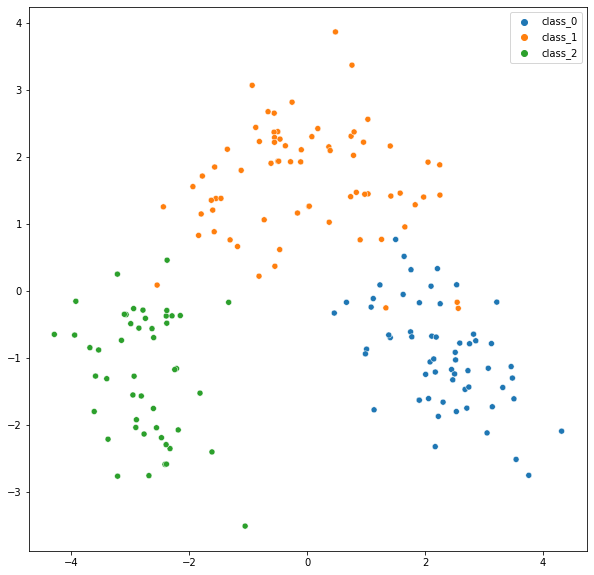

In [21]:
# código de solução
y = raw_data["target"]
class_names = raw_data["target_names"]
classes = [class_names[i] for i in y]
sns.scatterplot(new_values[:, 0], y=new_values[:, 1], hue=classes)

In [22]:
# classes distintas em agrupamentos de pontos distintos